In [36]:
#import relevant packagaes
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 

In [4]:
import skimage
from skimage.transform import resize
from pathlib import Path

In [14]:
#1. load data
root = "/Users/kay/Documents/Github/COVID-detection-from-XRay/Data/"
path = os.path.join(root,"NIHCXR/image1")

img_size = 224

df_train_img = list(Path(path).glob("*.png"))

# Take only the first 500 images to be the same size as positive sample
df_train_img = df_train_img[:500]

#2. convert images to numpy array
df_train_np = np.empty((len(df_train_img), img_size, img_size, 1), dtype=np.float32)
mpimg.imread(df_train_img[0])

#3. resize images 
for i, img_name in enumerate(df_train_img):
    try:
        temp_image = mpimg.imread(img_name)
        img_resize = resize(temp_image, (img_size, img_size, 1), anti_aliasing=True)
        df_train_np[i] = img_resize
    except:
        continue
print(df_train_np.shape)

#4. save processed images
np.save(os.path.join(path,"NIHCXR images size 224 arrays"), df_train_np, allow_pickle=False, fix_imports=False)

(500, 224, 224, 1)


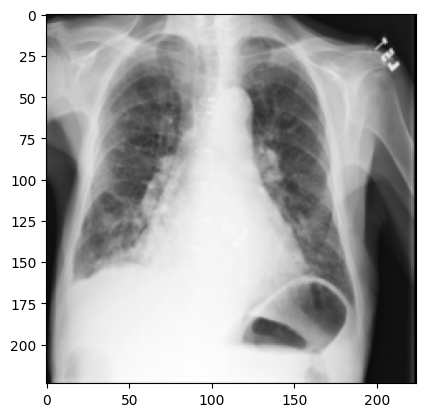

In [13]:
#5. look at a sample from the data, now in numpy format, no longer img format
plt.imshow(df_train_np[10], cmap='gray')

In [16]:
# Calculate descriptive statistics
mean_intensity = np.mean(df_train_np)
max_pixel_value = np.max(df_train_np)
min_pixel_value = np.min(df_train_np)
std_deviation = np.std(df_train_np)

# Print the results
print("Mean pixel intensity:", mean_intensity)
print("Maximum pixel value:", max_pixel_value)
print("Minimum pixel value:", min_pixel_value)
print("Standard deviation of pixel values:", std_deviation)

Mean pixel intensity: 0.5225701
Maximum pixel value: 1.0
Minimum pixel value: 0.0
Standard deviation of pixel values: 0.25115722


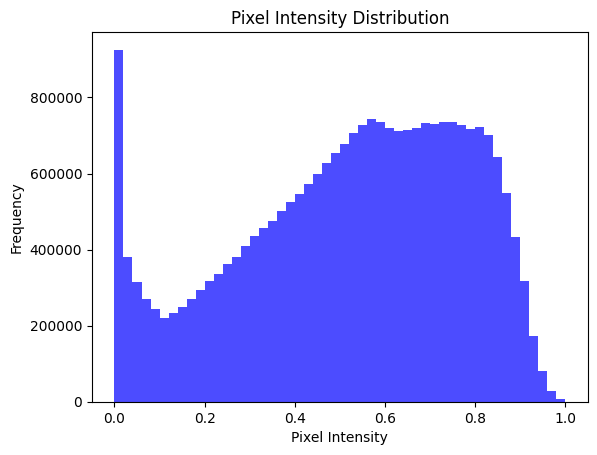

In [17]:
# Flatten the pixel values to compute histogram
pixel_values = df_train_np.flatten()

# Generate histogram
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

In [18]:
csv_path = os.path.join(root, "NIHCXR", "Data_Entry_2017_v2020.csv")

# Read in labels file
df_labels = pd.read_csv(csv_path)
print(df_labels.head())
print(df_labels.shape)

        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                       

In [26]:
image_filenames_first_500 = [img_path.name for img_path in df_train_img]

# Filter the DataFrame to include only the rows corresponding to the first 500 images
df_labels_500 = df_labels[df_labels['Image Index'].isin(image_filenames_first_500)]
df_labels_500

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168
14,00000005_001.png,No Finding,1,5,69,F,AP,2500,2048,0.168,0.168
16,00000005_003.png,No Finding,3,5,69,F,PA,2992,2991,0.143,0.143
18,00000005_005.png,No Finding,5,5,70,F,PA,2514,2991,0.143,0.143
19,00000005_006.png,Infiltration,6,5,70,F,PA,2992,2991,0.143,0.143
...,...,...,...,...,...,...,...,...,...,...,...
1223,00000311_001.png,No Finding,1,311,47,M,PA,2500,2048,0.168,0.168
1224,00000312_000.png,No Finding,0,312,86,M,PA,2992,2991,0.143,0.143
1225,00000312_001.png,Emphysema,1,312,86,M,PA,2992,2991,0.143,0.143
1226,00000312_002.png,No Finding,2,312,86,M,PA,2992,2991,0.143,0.143


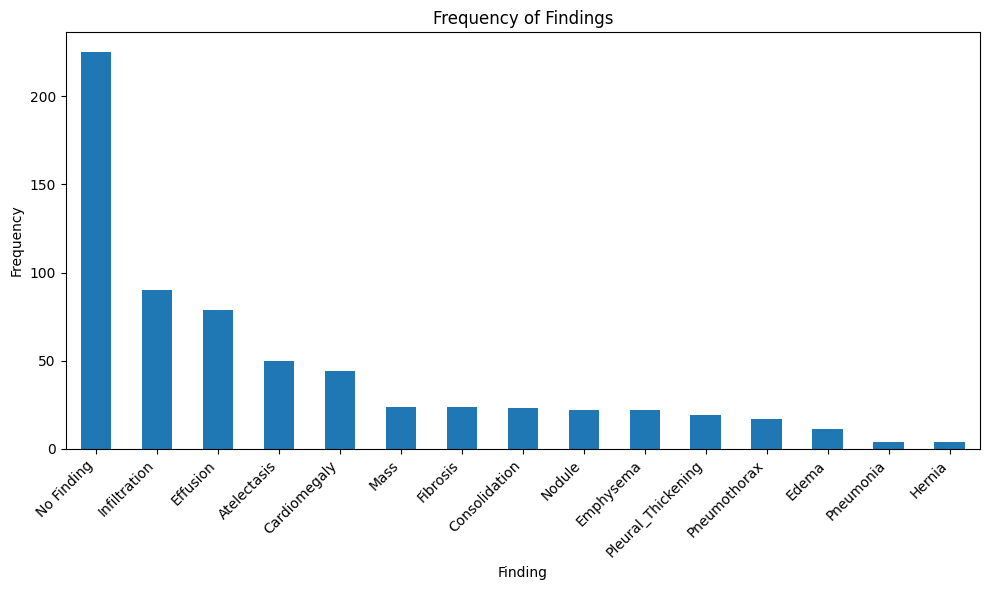

In [30]:
# Split values in the 'Finding Labels' column by '|'
split_values = df_labels_500['Finding Labels'].str.split('|')

# Create a list to store all findings
all_findings = []

# Iterate over each row and add the findings to the list
for values in split_values:
    all_findings.extend(values)

# Count the occurrences of each finding
finding_counts = pd.Series(all_findings).value_counts()

# Plot the frequencies of each finding
plt.figure(figsize=(10, 6))
finding_counts.plot(kind='bar')
plt.title('Frequency of Findings')
plt.xlabel('Finding')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

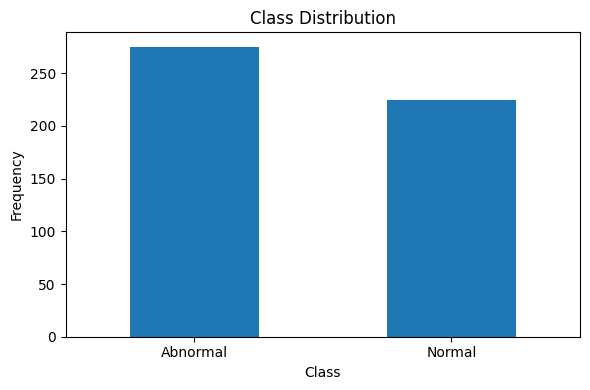

In [32]:
# Calculate the distribution of normal vs. abnormal cases
class_distribution = df_labels_500['Finding Labels'].apply(lambda x: 'Normal' if x == 'No Finding' else 'Abnormal').value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

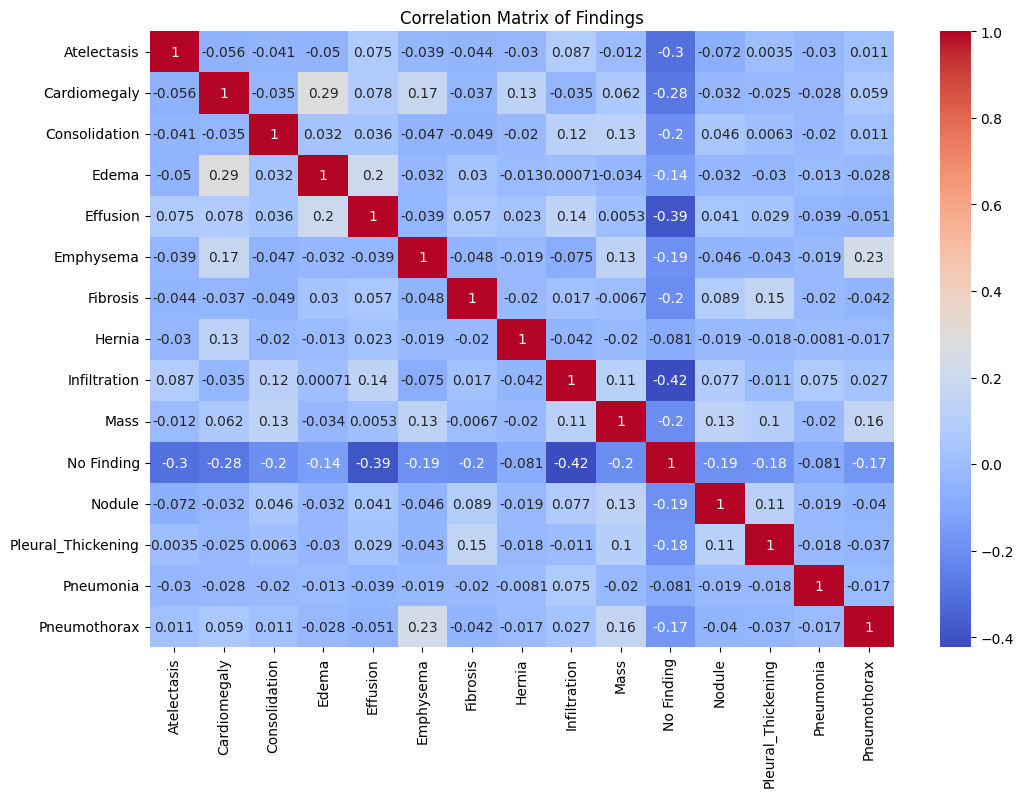

In [37]:
# Create a heatmap to visualize correlations between different findings
correlation_matrix = df_labels_500['Finding Labels'].str.get_dummies(sep='|').corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Findings')
plt.show()

In [41]:
split_values.explode().unique()

array(['Mass', 'Nodule', 'No Finding', 'Infiltration', 'Effusion',
       'Pneumothorax', 'Cardiomegaly', 'Emphysema', 'Atelectasis',
       'Pleural_Thickening', 'Fibrosis', 'Edema', 'Consolidation',
       'Pneumonia', 'Hernia'], dtype=object)

In [44]:
df_labels_500[df_labels_500['Finding Labels'].str.contains('Mass')]

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
12,00000004_000.png,Mass|Nodule,0,4,82,M,AP,2500,2048,0.168,0.168
38,00000013_022.png,Infiltration|Mass,0,13,56,M,PA,2870,2991,0.143,0.143
39,00000013_023.png,Infiltration|Mass|Pneumothorax,1,13,56,M,AP,2500,2048,0.168,0.168
41,00000013_025.png,Cardiomegaly|Infiltration|Mass|Nodule,3,13,56,M,PA,2992,2991,0.143,0.143
43,00000013_027.png,Cardiomegaly|Effusion|Emphysema|Mass,5,13,56,M,AP,2500,2048,0.168,0.168
46,00000013_030.png,Atelectasis|Cardiomegaly|Emphysema|Mass|Pneumo...,8,13,56,M,AP,2500,2048,0.168,0.168
47,00000013_031.png,Emphysema|Mass,9,13,56,M,AP,2500,2048,0.168,0.168
48,00000013_032.png,Emphysema|Mass|Pneumothorax,10,13,56,M,AP,2500,2048,0.168,0.168
60,00000013_044.png,Cardiomegaly|Mass|Pleural_Thickening,22,13,56,M,PA,2992,2991,0.143,0.143
104,00000023_004.png,Infiltration|Mass|Nodule,4,23,63,F,PA,2500,2048,0.168,0.168


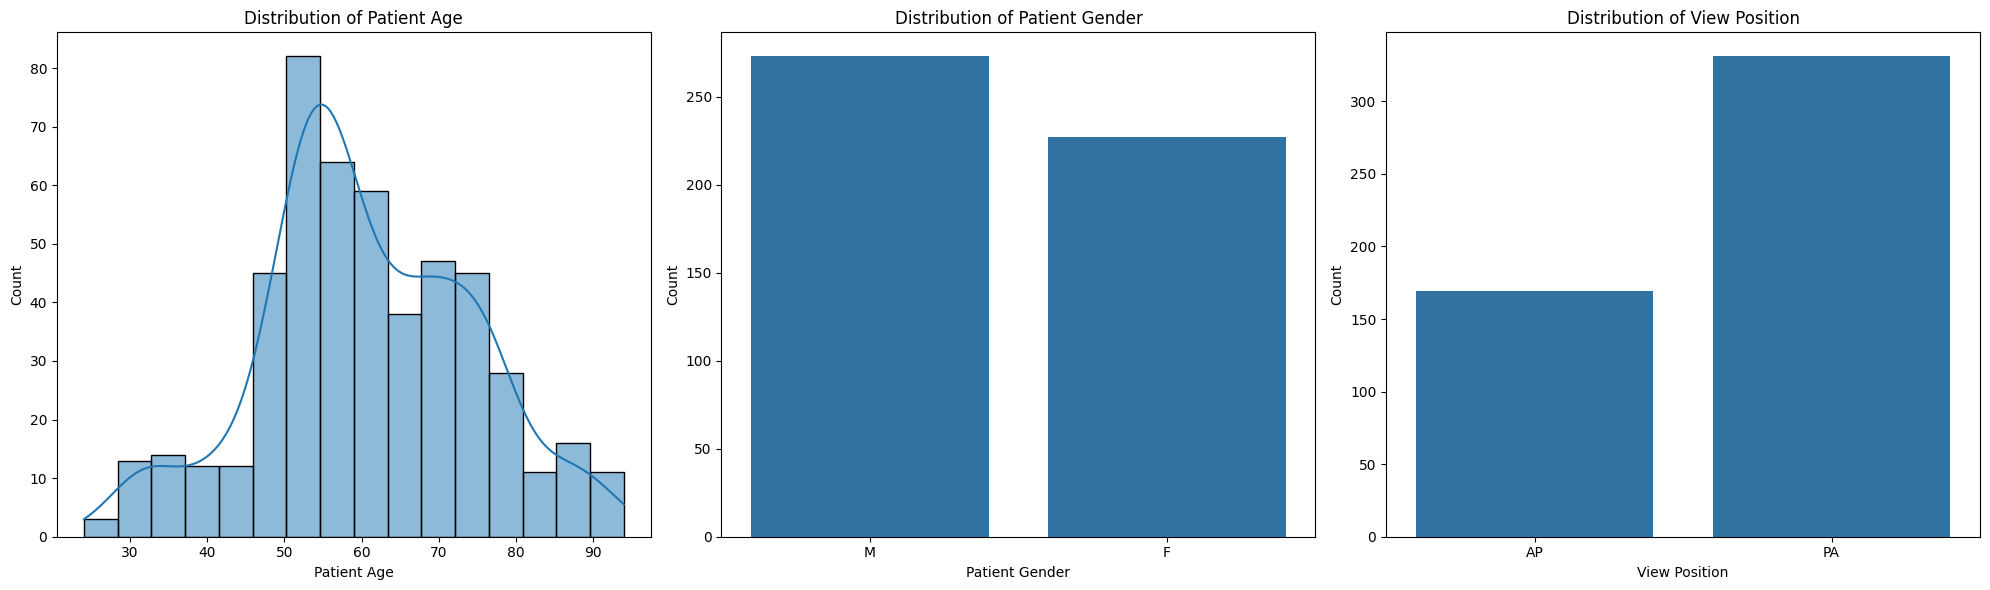

In [55]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Create count plots or histograms for patient age, patient gender, and view position
sns.histplot(data=df_labels_500, x='Patient Age', ax=axes[0], kde=True)
axes[0].set_title('Distribution of Patient Age')
axes[0].set_xlabel('Patient Age')
axes[0].set_ylabel('Count')

sns.countplot(data=df_labels_500, x='Patient Gender', ax=axes[1])
axes[1].set_title('Distribution of Patient Gender')
axes[1].set_xlabel('Patient Gender')
axes[1].set_ylabel('Count')

sns.countplot(data=df_labels_500, x='View Position', ax=axes[2])
axes[2].set_title('Distribution of View Position')
axes[2].set_xlabel('View Position')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

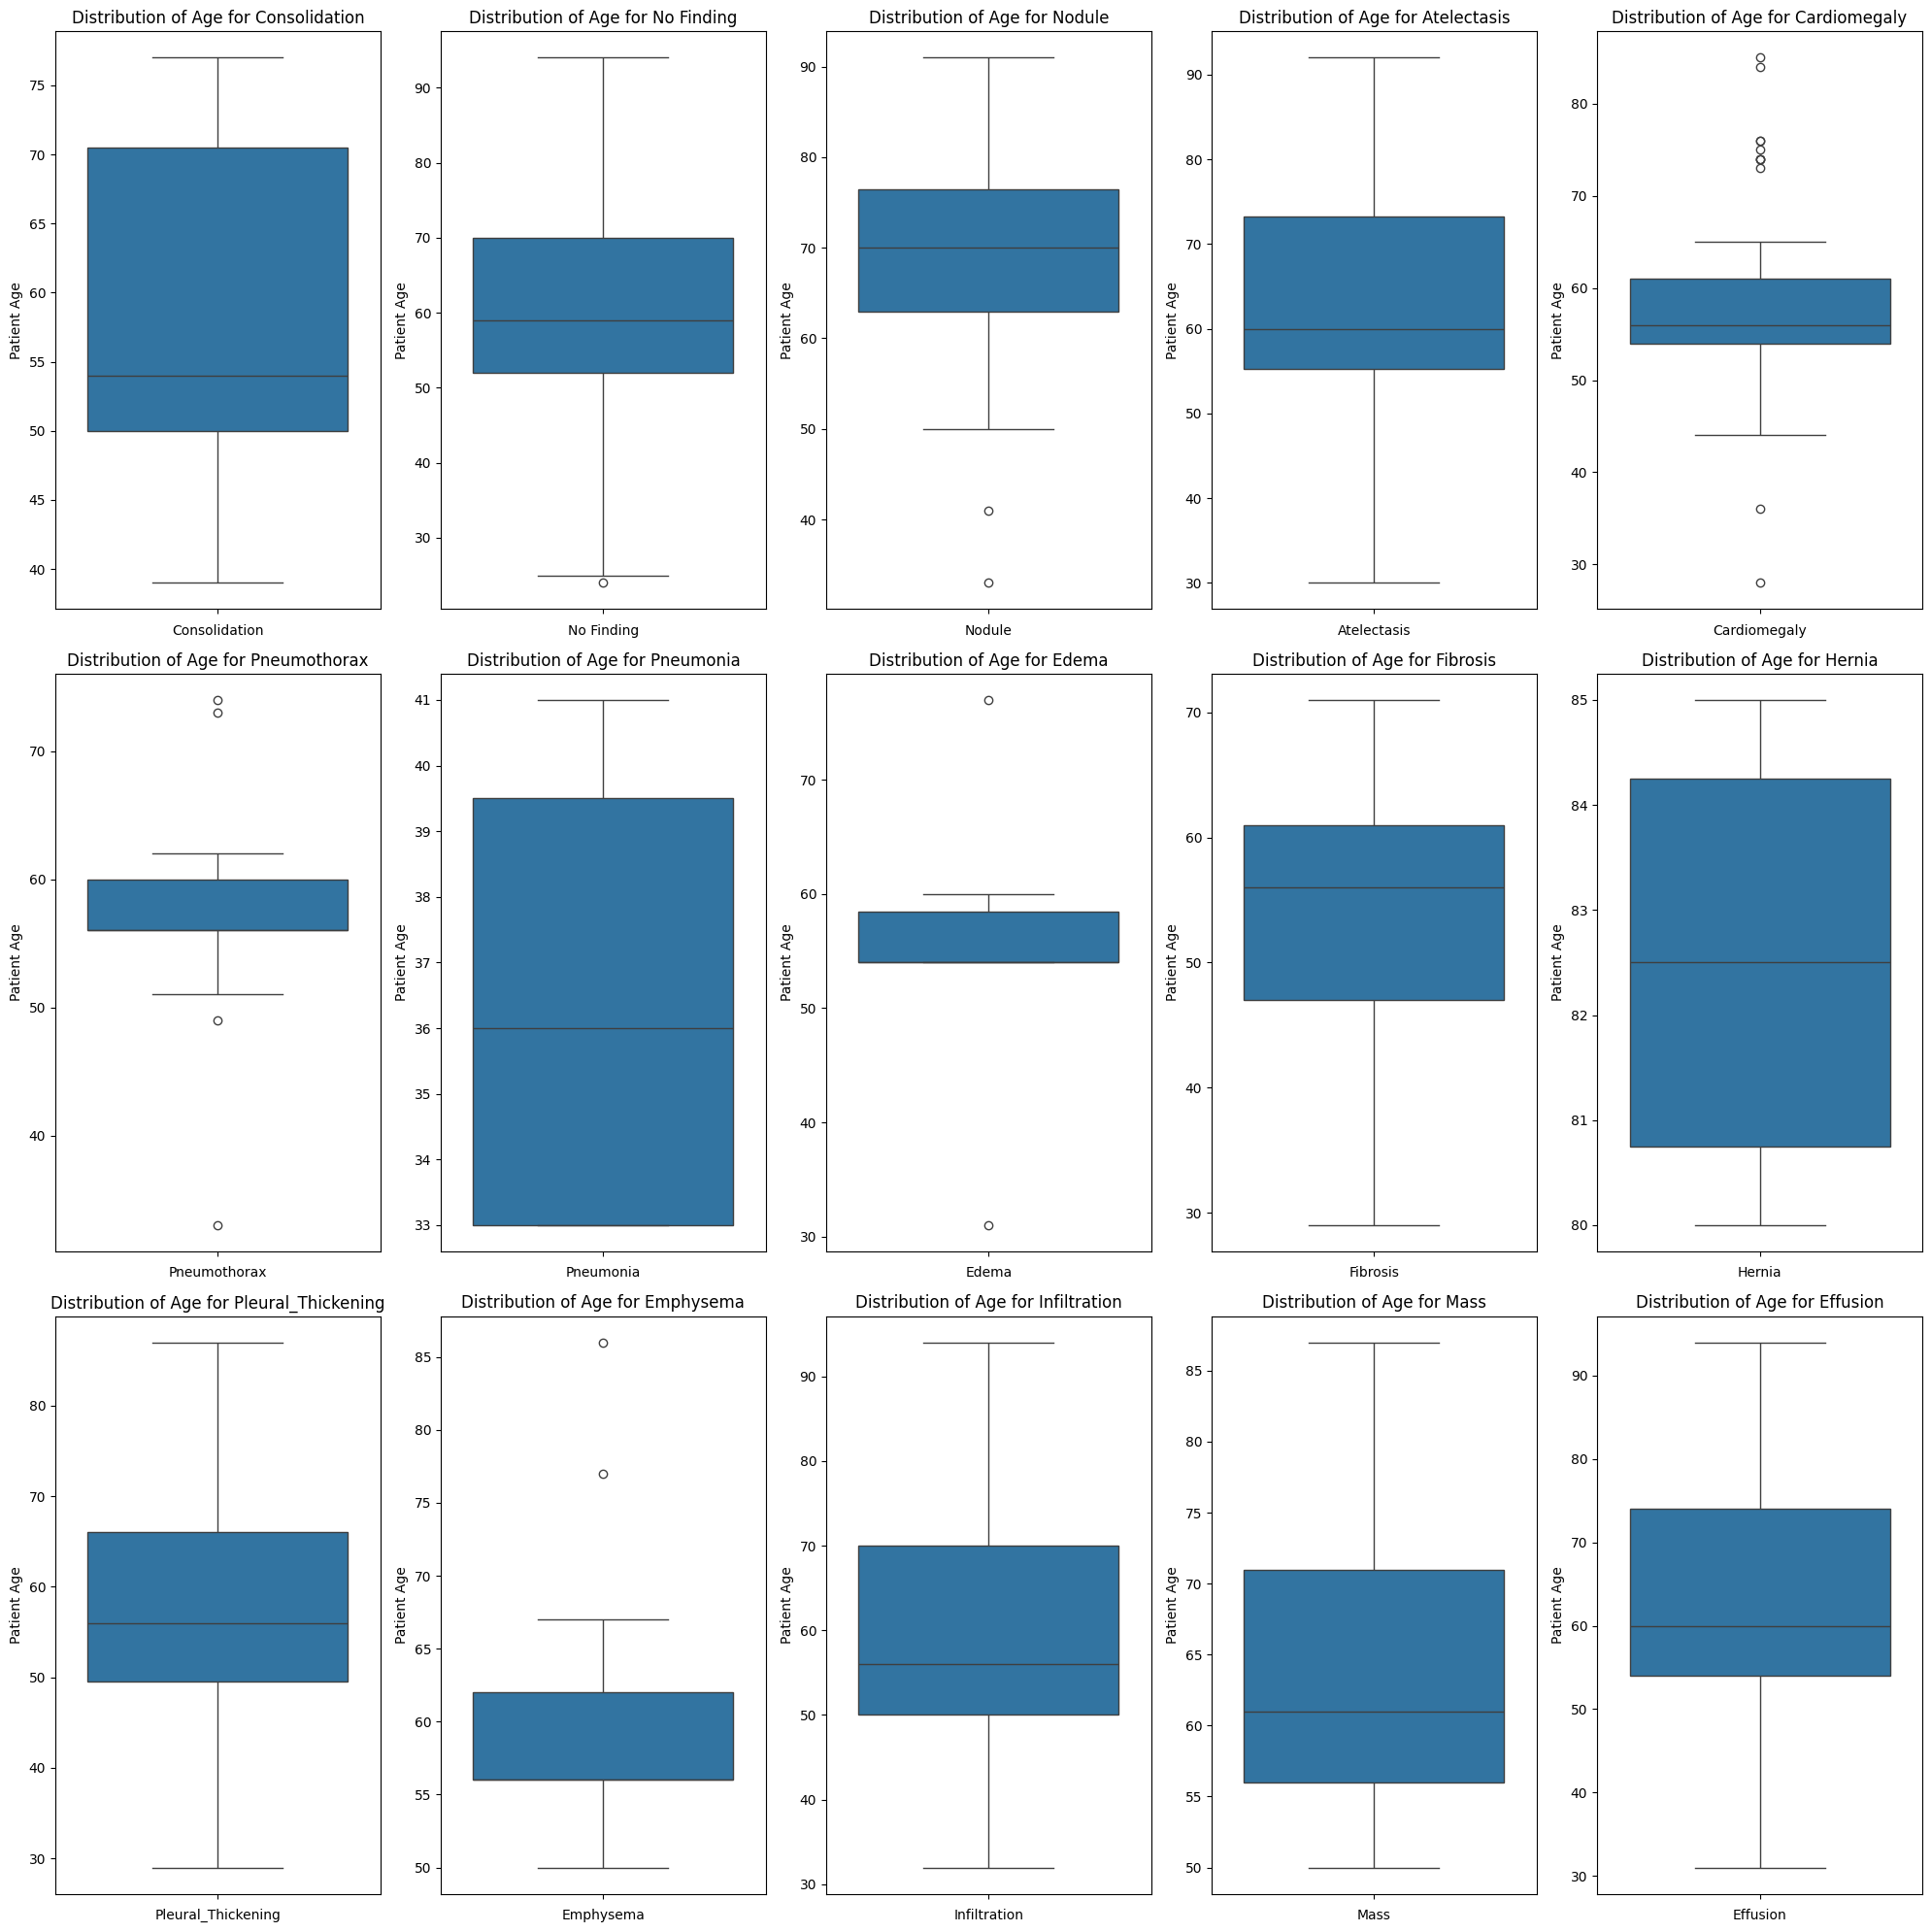

In [53]:
# Create boxplots to compare the distribution of age for different findings
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each unique finding and create a subplot for each
for i, finding in enumerate(unique_findings):
    # Filter the dataframe for the current finding
    subset_df = df_labels_500[df_labels_500['Finding Labels'].str.contains(finding)]
    
    # Create a boxplot for the distribution of patient age in the current subplot
    sns.boxplot(data=subset_df, y='Patient Age', ax=axes[i])
    
    # Set title, x-label, and y-label for the current subplot
    axes[i].set_title(f'Distribution of Age for {finding}')
    axes[i].set_xlabel(f'{finding}')
    axes[i].set_ylabel('Patient Age')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

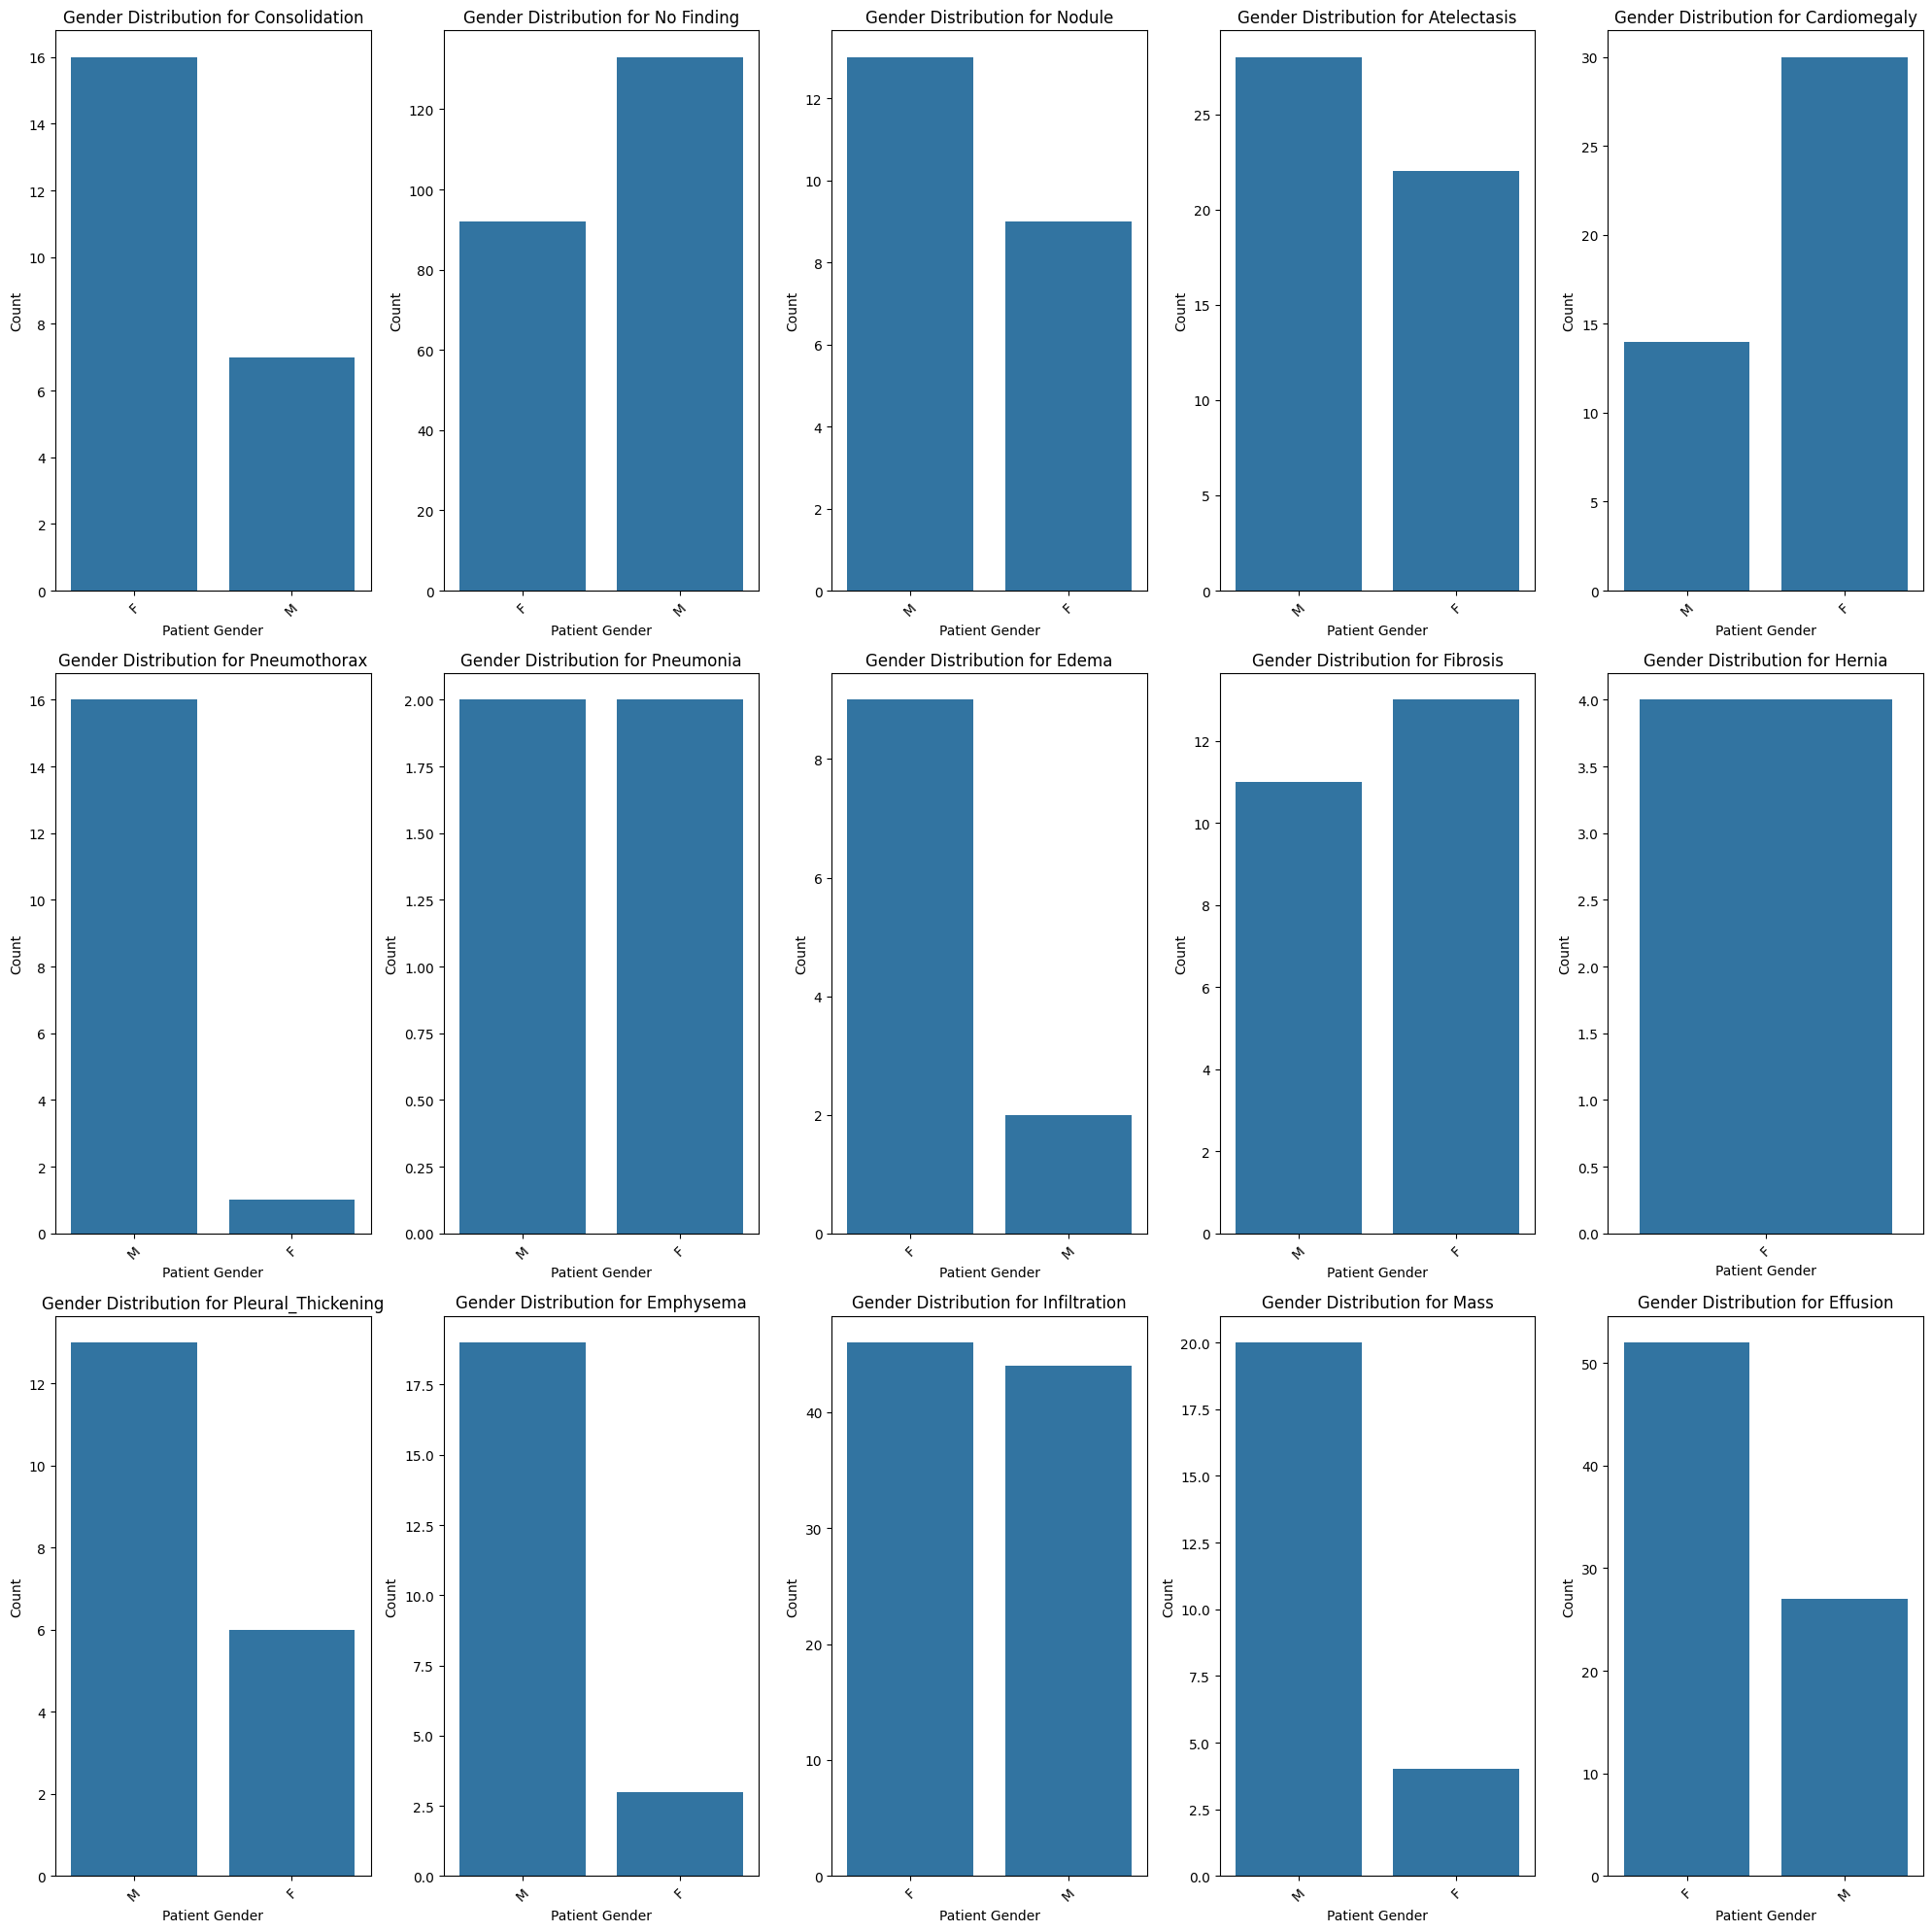

In [54]:
# Create boxplots to compare gender counts for different findings
# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(20, 20))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each unique finding and create a subplot for each
for i, finding in enumerate(unique_findings):
    # Filter the dataframe for the current finding
    subset_df = df_labels_500[df_labels_500['Finding Labels'].str.contains(finding)]
    
    # Create a count plot for the distribution of patient gender in the current subplot
    sns.countplot(data=subset_df, x='Patient Gender', ax=axes[i])
    
    # Set title, x-label, and y-label for the current subplot
    axes[i].set_title(f'Gender Distribution for {finding}')
    axes[i].set_xlabel('Patient Gender')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()